<a href="https://colab.research.google.com/github/soumodeep60/Python/blob/main/Basic_visualization_on_GDP_growth_(annual_)_country_wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic visualization** with **python**
*Soumodeep* *Das*\
soumodeep.das@praxis.ac.in

**Dataset** **details**:\
GDP growth (annual %) Country_wise\
source: *https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG*



*  Data is cutted from 2010 to 2020.\

**Task:**

*  Visualize the GDP Percent change with geographical plot.
*  Find out Highest positive and negetive change country..



# **Loading** **dataset**:

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/datasets"
filepath = "/content/drive/My Drive/datasets/"

 BigBasket.csv	 CO2_emission.csv   House_Rent_Dataset.csv  'Total reserve.csv'
 BigBazaar.csv	'GDP world.csv'     India_Menu.csv


In [ ]:
res = pd.read_csv(filepath + 'GDP world.csv')

In [ ]:
res.head(3)

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,-2.73,3.37,-1.04,6.43,-0.02,3.54,2.12,5.48,1.27,-2.09,-22.32
1,Africa Eastern and Southern,AFE,5.15,3.68,0.92,4.20,3.98,2.95,2.22,2.56,2.49,2.03,-2.89
2,Afghanistan,AFG,14.36,0.43,12.75,5.60,2.72,1.45,2.26,2.65,1.19,3.91,-2.35


In [ ]:
res.shape

(257, 13)

In [ ]:
res.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,253.000000,253.000000,253.000000,253.000000,255.000000,254.000000,254.000000,254.000000,254.000000,252.000000,249.000000
mean,4.558340,3.665415,3.093597,3.221502,3.326000,2.773543,3.072441,3.273465,3.102874,2.764921,-4.690241
std,4.125214,5.248899,7.550057,5.032426,3.674191,4.403545,3.545315,3.651399,2.852515,3.068085,7.335616
min,-8.920000,-50.340000,-46.080000,-36.390000,-23.040000,-27.990000,-10.780000,-6.990000,-19.350000,-11.200000,-54.010000
25%,2.170000,1.760000,0.920000,1.340000,1.655000,1.460000,1.625000,1.795000,1.832500,1.382500,-6.850000
50%,4.820000,3.920000,3.010000,3.360000,3.370000,2.950000,3.105000,3.220000,3.085000,2.550000,-3.770000
75%,6.800000,6.220000,5.380000,5.390000,5.095000,4.497500,4.657500,4.817500,4.820000,4.512500,-1.250000
max,25.120000,21.620000,86.830000,30.610000,26.560000,25.180000,29.210000,32.490000,9.030000,19.540000,43.480000


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  257 non-null    object 
 1   Country Code  257 non-null    object 
 2   2010          253 non-null    float64
 3   2011          253 non-null    float64
 4   2012          253 non-null    float64
 5   2013          253 non-null    float64
 6   2014          255 non-null    float64
 7   2015          254 non-null    float64
 8   2016          254 non-null    float64
 9   2017          254 non-null    float64
 10  2018          254 non-null    float64
 11  2019          252 non-null    float64
 12  2020          249 non-null    float64
dtypes: float64(11), object(2)
memory usage: 26.2+ KB


In [ ]:
res.isnull().sum()

Country Name    0
Country Code    0
2010            4
2011            4
2012            4
2013            4
2014            2
2015            3
2016            3
2017            3
2018            3
2019            5
2020            8
dtype: int64

**Findings:**\
Dataset has several null values

# **Data preprocessing**

**Data** **cleaning:**\
Treating missing or null values

In [ ]:
df=pd.DataFrame(res)

**Replacing** missing or null value with **average** **value**

In [ ]:
df['2010'] = df['2010'].fillna(df['2010'].mean())
df['2011'] = df['2011'].fillna(df['2011'].mean())
df['2012'] = df['2012'].fillna(df['2012'].mean())
df['2013'] = df['2013'].fillna(df['2013'].mean())
df['2014'] = df['2014'].fillna(df['2014'].mean())
df['2015'] = df['2015'].fillna(df['2015'].mean())
df['2016'] = df['2016'].fillna(df['2016'].mean())
df['2017'] = df['2017'].fillna(df['2017'].mean())
df['2018'] = df['2018'].fillna(df['2018'].mean())
df['2019'] = df['2019'].fillna(df['2019'].mean())
df['2020'] = df['2020'].fillna(df['2020'].mean())

In [ ]:
df.isnull().sum()

Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
dtype: int64

All **missing values are now adjusted** with average value.\
**Notes:**\
* Average value is taken beacuse the purpose is to show or create visualization based on data.

# **Visualization of data**

In [ ]:
df.columns

Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

**Geographical plotting**- Country_wise.\
**Plotly** is used for advanced geo plotting.

**Geo plotting - 2010**

In [ ]:
fig = px.choropleth(
    df,
    locations="Country Code",
    color="2010",
    hover_name="Country Name",
    hover_data=["2010"],
    title="GDP growth (annual %) in 2010",
    color_continuous_scale=px.colors.sequential.Blues,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Geo plotting - 2020**

In [ ]:
fig = px.choropleth(
    df,
    locations="Country Code",
    color="2020",
    hover_name="Country Name",
    hover_data=["2020"],
    title="GDP growth (annual %) in 2020",
    color_continuous_scale=px.colors.sequential.Blues,
    
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

* We can see here that USA and several countries has shown better positive growth change.
* Countries like Libiya and some others shown negetive percent change within this time period.

In [ ]:
px.scatter(df, x='2019', y='2020', color='Country Name',hover_name='Country Name', log_x=True, size_max=60)

Highest **positive** and **negetive** growth countries

Highest positive growth countries

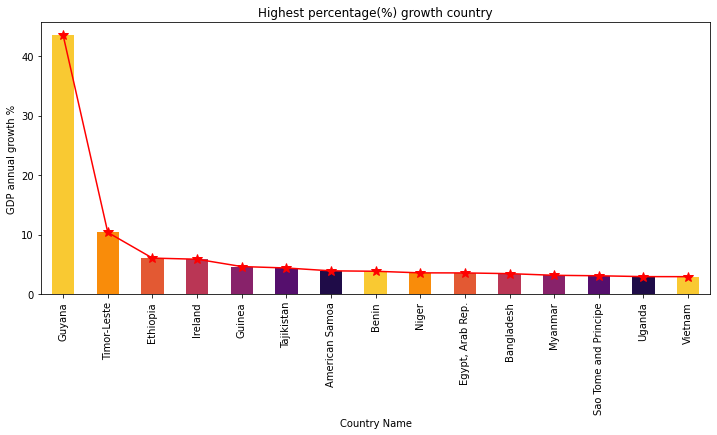

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Highest percentage(%) growth country')
plt.ylabel('GDP annual growth %')
df.groupby('Country Name')['2020'].mean().sort_values(ascending=False)[0:15].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('Country Name')['2020'].mean().sort_values(ascending=False)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

Highest negetive growth countries

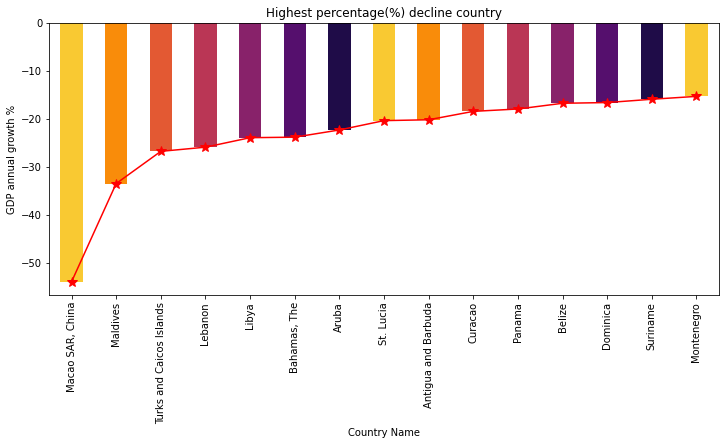

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Highest percentage(%) decline country')
plt.ylabel('GDP annual growth %')
df.groupby('Country Name')['2020'].mean().sort_values(ascending=True)[0:15].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('Country Name')['2020'].mean().sort_values(ascending=True)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

# Findings:
* Macao SAR, China has the maximum decline % change in GDP (annual %) - 2020
* Guyana has the maximum growth % change in GDP (annual %) - 2020
* Some countries like USA has improved their growth percent change.
* Some countries like Libya has not performed well within this 10 year.
